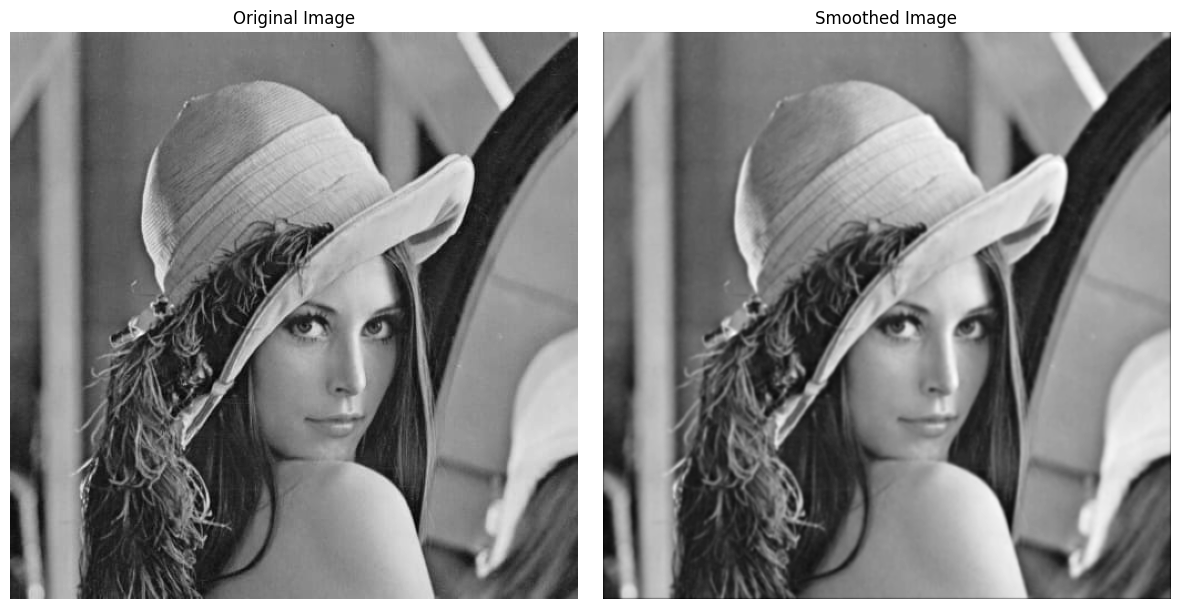

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Load image from URL
def get_img(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('L')  # Grayscale
        return np.array(img)
    except Exception as e:
        print("Error loading image:", e)
        return None

# Create Gaussian kernel
def gauss_kern(sz, s):
    """Make Gaussian kernel."""
    k = np.zeros((sz, sz))
    ctr = sz // 2
    for i in range(sz):
        for j in range(sz):
            x, y = i - ctr, j - ctr
            k[i, j] = (1 / (2 * np.pi * s**2)) * np.exp(-(x**2 + y**2) / (2 * s**2))
    return k / np.sum(k)

# Convolution function
def conv(img, k):
    """Apply convolution."""
    try:
        h, w = img.shape
        k_sz = k.shape[0]
        p = k_sz // 2
        padded_img = np.pad(img, ((p, p), (p, p)), mode='constant', constant_values=0)
        result = np.zeros_like(img)

        for i in range(h):
            for j in range(w):
                region = padded_img[i:i+k_sz, j:j+k_sz]
                result[i, j] = np.sum(region * k)
    except Exception as e:
        print("Error during convolution:", e)
    return result

# Main
def main():
    img_url = 'https://github.com/saptarshihalder/Assignment/blob/main/Image.jpg?raw=true'
    img = get_img(img_url)  # Get the image

    g_kern = gauss_kern(5, 1)  # Gaussian kernel
    smooth_img = conv(img, g_kern)  # Smoothed image

    # Display original and smoothed images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(smooth_img, cmap='gray')
    plt.title('Smoothed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
